# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
missing_values = ["n/a", "na", "--", " ", "N/A", "NA","unknown"]

df = pd.read_csv('smartphones.csv', na_values=missing_values)
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [3]:
baris,kolom = df.shape
print('baris:', baris)
print('kolom:', kolom)

baris: 1020
kolom: 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

# Preprocessing & Cleaning

In [8]:
# hapus fitur yang tidak perlu
df.drop(['rating','card','price','model'], axis=1, inplace=True)

In [9]:
# hapus missing value
df.dropna(inplace=True)

In [10]:
df.head(3)

,sim,processor,ram,battery,display,camera,os
0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13
1,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13


In [11]:
# encoding kategori dengan scikit-learn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [12]:
df['sim'] = label.fit_transform(df['sim'])
df['processor'] = label.fit_transform(df['processor'])
df['ram'] = label.fit_transform(df['ram'])
df['battery'] = label.fit_transform(df['battery'])
df['display'] = label.fit_transform(df['display'])
df['camera'] = label.fit_transform(df['camera'])
df['os'] = label.fit_transform(df['os'])

In [13]:
df.head(3)

,sim,processor,ram,battery,display,camera,os
0,8,239,3,172,263,174,9
1,6,219,32,184,188,233,7
2,6,69,26,176,200,160,9


In [14]:
# standar scaller
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
df[['sim','processor','ram','battery','display','camera','os']] = scaler.fit_transform(df[['sim','processor','ram','battery','display','camera','os']])

In [16]:
df.head(3)

,sim,processor,ram,battery,display,camera,os
0,-0.452628,1.199319,-2.306589,0.366589,1.030571,0.289860,-0.446071
1,-1.146266,0.954565,0.381167,0.579927,0.138734,0.996125,-0.589081
2,-1.146266,-0.881090,-0.174921,0.437701,0.281428,0.122272,-0.446071


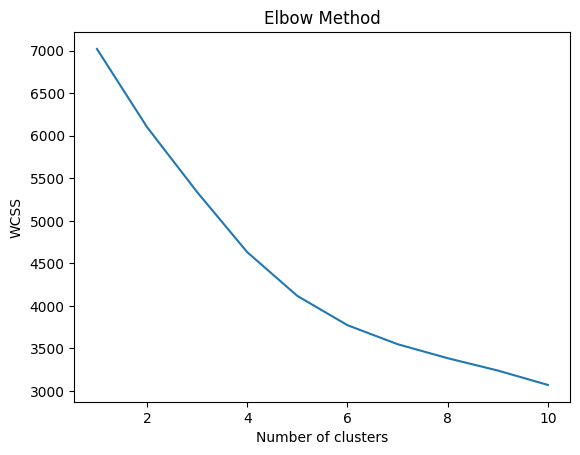

In [17]:
# cek cluster yang optimal dengan elbow method dan silhouette score
from sklearn.cluster import KMeans

X = df[['sim','processor','ram','battery','display','camera','os']]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
# implementasi kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['cluster'] = y_kmeans
df.head(3)

,sim,processor,ram,battery,display,camera,os,cluster
0,-0.452628,1.199319,-2.306589,0.366589,1.030571,0.289860,-0.446071,1
1,-1.146266,0.954565,0.381167,0.579927,0.138734,0.996125,-0.589081,3
2,-1.146266,-0.881090,-0.174921,0.437701,0.281428,0.122272,-0.446071,2


/home/limitmax/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


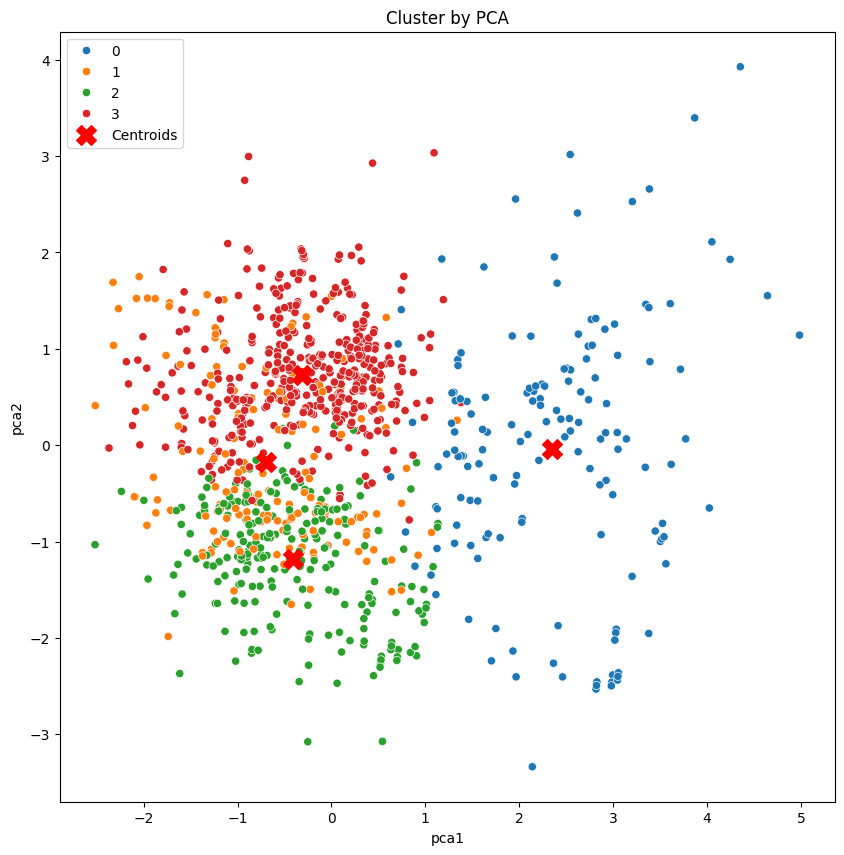

In [19]:
# visualisasi hasil cluster dengan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = y_kmeans

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_
centroid_pca = pca.transform(centroids)
centroid_df = pd.DataFrame(centroid_pca, columns=['pca1', 'pca2'])

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='tab10')
plt.scatter(centroid_df['pca1'], centroid_df['pca2'], marker='X', s=200, c='red', label='Centroids')
plt.title('Cluster by PCA')
plt.legend()
plt.show()

In [20]:
# hitung Silhouette Score, Calinski-Harabasz Index, dan Davies-Bouldin Index
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
print('Silhouette Score:', silhouette_score(X, y_kmeans))
print('Calinski-Harabasz Index:', calinski_harabasz_score(X, y_kmeans))
print('Davies-Bouldin Index:', davies_bouldin_score(X, y_kmeans))


Silhouette Score: 0.18339180810032987
Calinski-Harabasz Index: 171.8109180257768
Davies-Bouldin Index: 1.7178171300282068


# Cluster Profilling

In [21]:
# Add K-Means Prediksi ke Data Frame
df['cluster'] = y_kmeans

# Rata-Rata tiap Cluster
df.groupby('cluster').mean().T

cluster,0,1,2,3
sim,0.617491,-0.470776,-0.860140,0.440885
processor,-0.023968,0.754066,-1.061035,0.292921
ram,-0.114556,-0.610846,0.442954,0.036832
battery,-1.819193,0.081207,0.247327,0.462850
display,-1.275531,0.965238,0.011003,0.057446
camera,-0.354740,0.353819,0.128556,-0.086082
os,0.469856,1.203125,-0.063517,-0.599343
